<a href="https://colab.research.google.com/github/deehzee/mlgym/blob/main/dlpy/02_mathematical_building_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2: Mathematical Building Blocks of Neural Networks

## 2.1: Preview

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images.shape, train_images.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
test_images.shape, test_images.dtype

((10000, 28, 28), dtype('uint8'))

In [ ]:
train_labels.shape, train_labels.dtype

((60000,), dtype('uint8'))

In [ ]:
test_labels.shape, test_labels.dtype

((10000,), dtype('uint8'))

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
import keras
from keras import layers

keras.backend.backend()

'tensorflow'

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ]
)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
train_images = train_images.reshape((train_images.shape[0], -1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], -1)).astype('float32') / 255

(train_images.shape, train_images.dtype), (test_images.shape, test_images.dtype)

(((60000, 784), dtype('float32')), ((10000, 784), dtype('float32')))

In [ ]:
train_loss, train_acc = model.evaluate(train_images, train_labels)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1254 - loss: 2.3283
Train accuracy: 0.1250,  Train loss: 2.3281


In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8708 - loss: 0.4593
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9661 - loss: 0.1175
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9783 - loss: 0.0721
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9856 - loss: 0.0487
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9896 - loss: 0.0362


In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([2.2504933e-07, 2.7455908e-07, 2.3131486e-05, 3.9360631e-04,
       4.1928566e-10, 4.2615666e-06, 2.1824606e-10, 9.9956292e-01,
       8.5958118e-06, 6.9639691e-06], dtype=float32)

In [ ]:
predictions[0].argmax()

np.int64(7)

In [ ]:
predictions[0][7]

np.float32(0.9995629)

In [ ]:
test_labels[0]

np.uint8(7)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.0762


## 2.2: Data Representations

In [25]:
import numpy as np

In [26]:
x = np.array(12)

In [27]:
x

array(12)

In [28]:
x.shape, x.ndim, x.dtype

((), 0, dtype('int64'))

In [29]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [30]:
x.shape, x.ndim, x.dtype

((5,), 1, dtype('int64'))

In [31]:
x = np.array([[5, 8, 9, 10, 0],
              [11, 9, 12, -1, 6],
              [1, 3, 0, 5, 9]])
x

array([[ 5,  8,  9, 10,  0],
       [11,  9, 12, -1,  6],
       [ 1,  3,  0,  5,  9]])

In [32]:
x.shape, x.ndim, x.dtype

((3, 5), 2, dtype('int64'))

In [33]:
x = np.array([[[5, 7, 2, 3, 0],
               [6, 9, 3, 5, 1],
               [7, 0, 4, 6, 2]],
              [[5, 7, 8, 9, 0],
               [1, 3, 2, -1, 0],
               [0, 1, 8, 9, 1]]])
x

array([[[ 5,  7,  2,  3,  0],
        [ 6,  9,  3,  5,  1],
        [ 7,  0,  4,  6,  2]],

       [[ 5,  7,  8,  9,  0],
        [ 1,  3,  2, -1,  0],
        [ 0,  1,  8,  9,  1]]])

In [34]:
x.shape, x.ndim, x.dtype

((2, 3, 5), 3, dtype('int64'))

In [35]:
from keras.datasets import mnist

In [36]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [38]:
train_images.ndim, train_images.shape, train_images.dtype

(3, (60000, 28, 28), dtype('uint8'))

In [39]:
import matplotlib.pyplot as plt

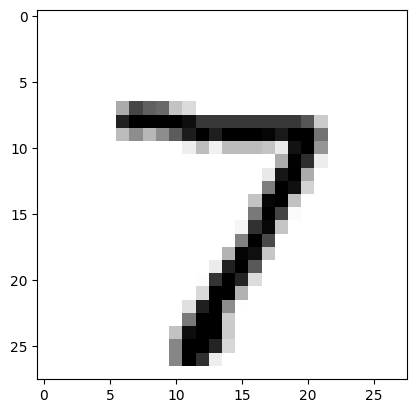

In [43]:
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [41]:
test_labels[0]

np.uint8(7)

In [44]:
# Take images from #10 to #100 (excl)
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [45]:
# Bottom right corner of the images
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [46]:
# Middle of the images
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

In [48]:
# n-th batch (axis 0 is the samples)
n=2
batch = train_images[128 * n : 128 * (n + 1)]
batch.shape

(128, 28, 28)

- **Vector data**: Rank-2 tensors of shape `(samples, features)`, where each sample is a vector of numerical attributes ("features").
- **Timeseries data or sequence data**: Rank-3 tensors of shape `(samples, timesteps, features)`, where each sample is a sequence (of length `timesteps`) of feature vectors.
- **Images**: Rank-4 tensors of shape `(samples, height, width, channels)`, where each sample is a 2D grid of pixels, each pixel is represented by a vector of values ("channels").
- **Video**: Rank-5 tensors of shape `(samples, frames, height, width, channels)`, where each sample is a sequence (of length `frames`) of images.

## 2.3 + 2.4: Tensor Operations and Vectorization

In [50]:
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [51]:
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [56]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.83 s


In [57]:
import numpy as np

t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z, 0.0)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


## 2.5: Broadcasting

In [65]:
import numpy as np

x = np.random.random((32, 10))
y = np.random.random((10,))

x.shape, y.shape

((32, 10), (10,))

In [66]:
y1 = np.expand_dims(y, axis=0)
y1.shape

(1, 10)

In [67]:
y2 = y[np.newaxis, :]
y2.shape

(1, 10)

In [71]:
np.all(y1 == y2)

np.True_

In [72]:
y = y1

In [73]:
Y = np.tile(y, (x.shape[0], 1))
Y.shape

(32, 10)

In [75]:
def naive_add_matrix_and_vector(x, y):
  assert x.ndim == 2
  assert y.ndim == 1
  assert x.shape[1] == y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x